# Configurations and Stylesheets

### Manual Customization
- Here is a fairly drab default histogram:

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

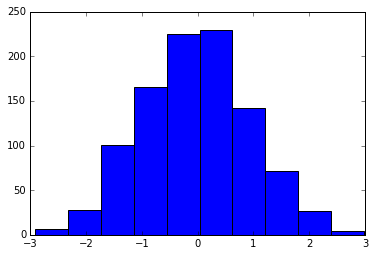

In [3]:
x = np.random.randn(1000)
plt.hist(x);

- Various customizations to make it more pleasing:

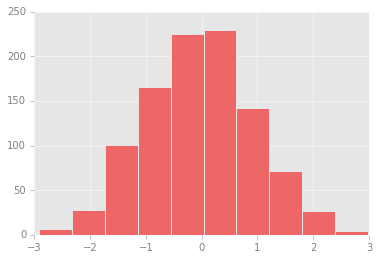

In [4]:
# use a gray background
# ax = plt.axes(axisbg='#E6E6E6') -- axisbg deprecated in Matplotlib v2.0
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# draw solid white grid lines
plt.grid(color='w', linestyle='solid')

# hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
# hide top and right ticks
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# lighten ticks and labels
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')
    
# control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

### Changing the Defaults

- Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create.
- This configuration can be adjusted at any time using ``plt.rc``.
- Start by saving a copy of the current ``rcParams`` dictionary, so we can easily reset these changes in the current session.

In [5]:
IPython_default = plt.rcParams.copy()

- Use the ``plt.rc`` function to change some of these settings, and re-plot.

In [6]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

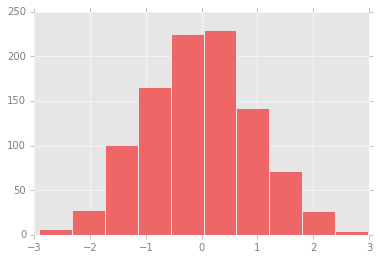

In [7]:
plt.hist(x);

- Simple line plots look like with these rc parameters:

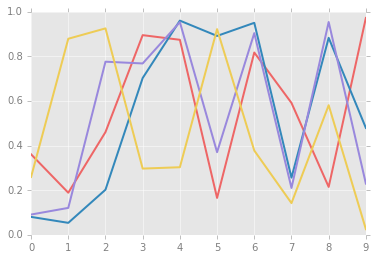

In [8]:
for i in range(4):
    plt.plot(np.random.rand(10))

- Settings can be saved in a *.matplotlibrc* file, which you can read about in the [Matplotlib documentation](http://Matplotlib.org/users/customizing.html).

### Stylesheets

- Matplotlib v1.4 added a ``style`` module which includes a number of default stylesheets, as well as the ability to create and package your own styles. These stylesheets are formatted similarly to the *.matplotlibrc* files mentioned earlier, but must be named with a *.mplstyle* extension.
- Available styles are listed in ``plt.style.available``—here I'll list only the first five for brevity:

In [9]:
plt.style.available[:5]

['seaborn-deep',
 'classic',
 'fivethirtyeight',
 'seaborn-notebook',
 'seaborn-whitegrid']

- The basic way to switch to a stylesheet is to call
    ``` python
    plt.style.use('stylename')
    ```

- This will change the style for the rest of the session. You can also set a style temporarily:
    ``` python
    with plt.style.context('stylename'):
        make_a_plot()
    ```


- Let's create a function that will make two basic plot types.

In [10]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

### Default style

- The default style is what we've been seeing so far throughout the book; we'll start with that.
First, let's reset our runtime configuration to the notebook default:

In [11]:
# reset rcParams
plt.rcParams.update(IPython_default);

Now let's see how it looks:

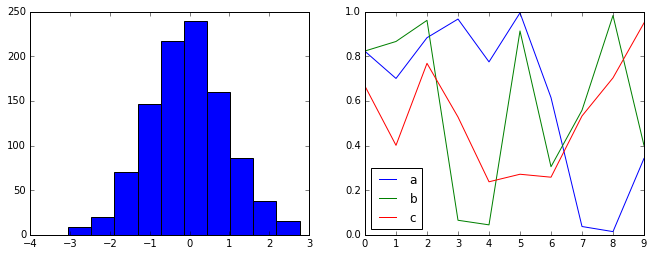

In [12]:
hist_and_lines()

### FiveThiryEight style

- This mimics the graphics found on the popular [FiveThirtyEight website](https://fivethirtyeight.com).

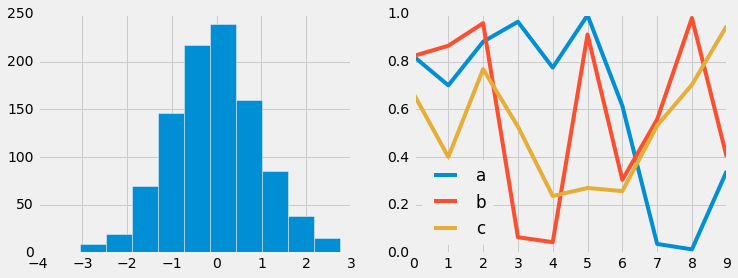

In [13]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

- The ``ggplot`` package in the R language is a very popular visualization tool. Matplotlib's ``ggplot`` style mimics the default styles from that package:

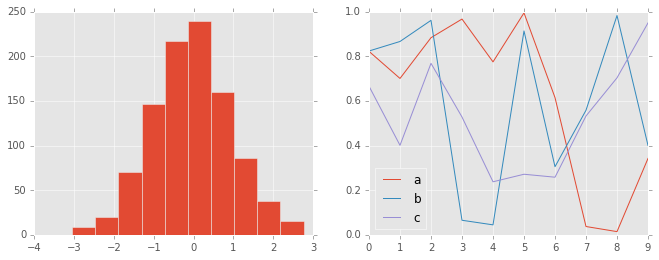

In [14]:
with plt.style.context('ggplot'):
    hist_and_lines()

### Bayesian Methods for Hackers
- This style comes from an online book [*Probabilistic Programming and Bayesian Methods for Hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/) and is reproduced in the ``bmh`` stylesheet:

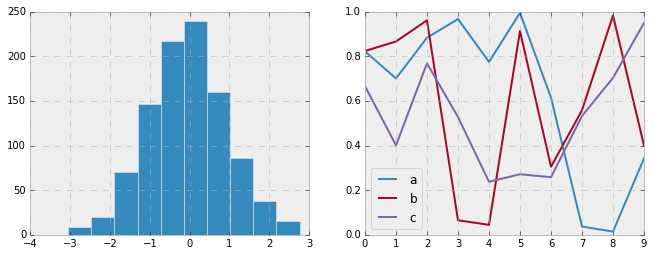

In [15]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark background

- Dark backgrounds are often preferred for presentations.

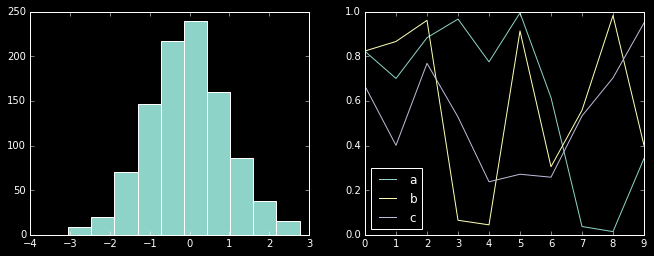

In [16]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

Sometimes you might to prepare data for a print publication that does not accept color figures.

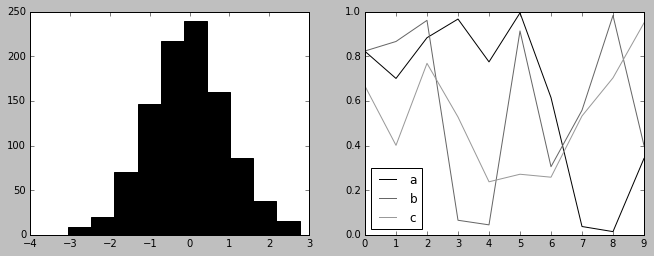

In [17]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

- Matplotlib also has stylesheets inspired by the Seaborn library (discussed more fully in [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)). These styles are loaded automatically when Seaborn is imported into a notebook.

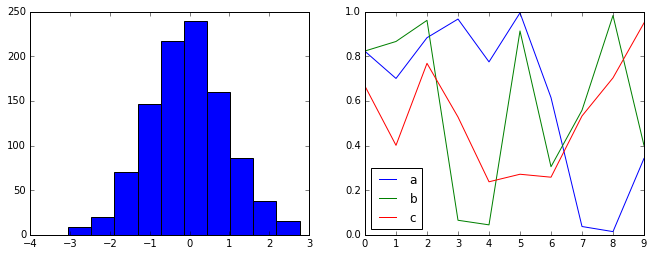

In [18]:
import seaborn
hist_and_lines()